In [1]:
import matplotlib.pyplot as plt

### Code From Learning Suite

Note: I copied the provided code and put it in a "jupyter notebook" format.

In [2]:
def f(s, i, r, beta, gamma, N):
    # From dS/dt equation
    return -beta*i*s/N


def g(s, i, r, beta, gamma, N):
    # From dI/dt equation
    return beta*i*s/N - gamma*i


def h(s, i, r, beta, gamma, N):
    # From dR/dt equation
    return gamma*i

In [3]:
def main(N, beta, gamma, duration=140):
    #########################################
    # SIR model parameters
    #########################################
    dt = 0.1        # Numerical integration time step

    #########################################
    # Initialize states of the population
    #########################################
    S = [N-1]
    I = [1]
    R = [0]
    t = [0]

    #########################################
    # Use numerical integration to estimate time series
    # Euler method
    #########################################
    while t[-1] < duration:
        s = S[-1]
        i = I[-1]
        r = R[-1]  # Get most recent population value
        S.append(s + dt*f(s, i, r, beta, gamma, N))
        I.append(i + dt*g(s, i, r, beta, gamma, N))
        R.append(r + dt*h(s, i, r, beta, gamma, N))
        t.append(t[-1]+dt)

    plt.figure(1)
    plt.plot(t, S, 'r', t, I, 'g--', t, R, 'b:')
    plt.legend(['S', 'I', 'R'])
    title = 'SIR model via Euler: beta = ' + \
        str(beta) + ', gamma = ' + str(gamma) + ', and R0 = ' + str(beta/gamma)
    plt.title(title)
    plt.show()

    #########################################
    # Repeat using a slightly more sophisticated numerical integration method
    #########################################

    #########################################
    # Initialize states of the population
    #########################################
    S = [N-1]
    I = [1]
    R = [0]
    t = [0]

    #########################################
    # Use numerical integration to estimate time series
    # Midpoint method
    #########################################
    while t[-1] < duration:
        s = S[-1]
        i = I[-1]
        r = R[-1]
        s1 = s + dt/2*f(s, i, r, beta, gamma, N)
        r1 = r + dt/2*g(s, i, r, beta, gamma, N)
        i1 = i + dt/2*h(s, i, r, beta, gamma, N)
        S.append(s + dt*f(s1, i1, r1, beta, gamma, N))
        I.append(i + dt*g(s1, i1, r1, beta, gamma, N))
        R.append(r + dt*h(s1, i1, r1, beta, gamma, N))
        t.append(t[-1]+dt)

    #  Uncomment if you'd like to compare results from the two integration methods
    # plt.figure(2)
    # plt.plot(t,S,'r',t,I,'g--',t,R,'b:')
    # plt.legend(['S','I','R'])
    # title = 'SIR model via midpoint: beta = ' + str(beta) + ', gamma = ' + str(gamma) + ', and R0 = ' + str(beta/gamma)
    # plt.title(title)
    # plt.show()

### Variables and What They Mean

Note: this small section is more for my benefit (notes/expalantions about what each parameter represents)

<b>Beta</b>:

Average number of contacts per person per day, multiplied by the probability that a susceptible person gets infected by and infectious person.  This means that if beta is large, people will get infected faster.

<b>Gamma</b>:

Rate at which infectious individuals recover from the disease.  This means that if gamma is large, people will recover faster.

<b>N</b>:

Population size.

<b>R0</b>:

Mathematically, R0 = beta / gamma, so it's a balance between infectious inflow (beta) and infectious outflow (gamma); in other words, how quickly the infection spreads early on.  If R0 > 1, people get infected faster than they recover (so large growth at first).  If R0 < 1, people recover faster than they get get infected (no pandemic).

# Plots and Expalantions

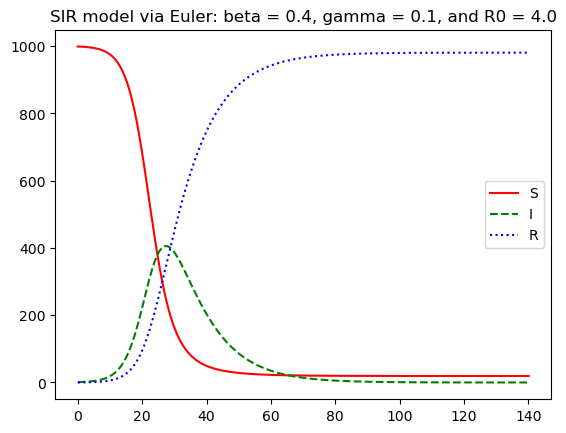

In [4]:
beta, gamma, N = 0.4, 0.1, 1000
main(N, beta, gamma)

These were the default parameters provided with the code.  We can see that, intially, people slowly move from susceptible to infectious.  The number of infected people then quickly grows.  Once the peak number of infected is reached, people quickly begin to move out of the infectious state.  After about 80 days, a stable state is reached where the number of people in any of the states remains the same.  We can also see that not everyone was infected (the right tail of the red line is above 0).  In terms of R0, these results make sense because R0 is larger than 1 (people get infected faster than they recover during the early stages of virus spread).

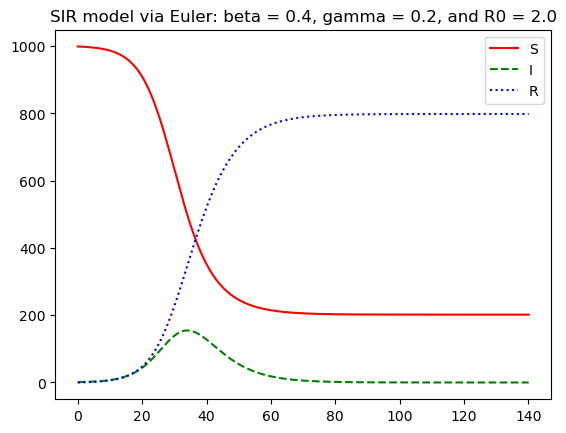

In [5]:
beta, gamma, N = 0.4, 0.2, 1000
main(N, beta, gamma)

For this plot, I used the same parameters for beta and N, but increased the value of gamma from 0.1 to 0.2.  Compared to the previous graph, we can see that the infection doesn't spread as quickly (peak occurs after about 35 days, versus about 25 days from the previous graph).  The number of peak infections is also smaller.  A stable state is reached faster (after about 70 days), and the number of people that were never infected is about 200 (right tail of the red line).  In terms of R0, we can see why this is case when compared to the previous graph.  Here the R0 is 2, so there is still an initial pandemic (R0 > 1), but the R0 from the previous graph was 4.  Since R0 represents a balance between infectious inflow and outflow, a smaller R0 means that the pandemic isn't as severe.

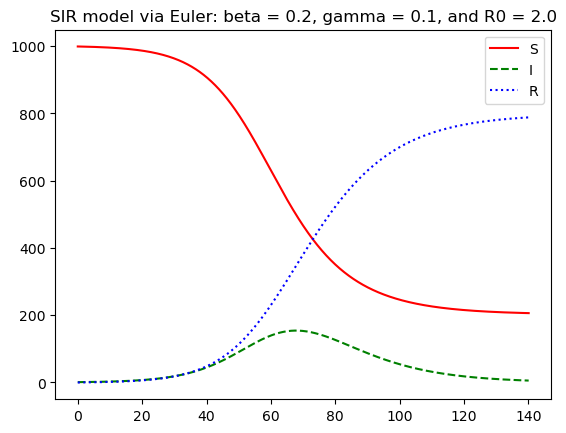

In [6]:
beta, gamma, N = 0.2, 0.1, 1000
main(N, beta, gamma)

Here, I went back to a gamma of 0.1 and used the same value for N, but decreased beta from 0.4 to 0.2.  Like the previous graph, R0 is 2.  However, the time to reach peak infections is now much larger (about 65) and the time to reach a stable state appears to be about 140.  It's interesting that, even though the R0 values are the same, the results are different.  This makes sense, however, because beta represents the rate at which people enter the infectious state, so having a lower beta result in a longer time to reach peak infections seems reasonable.

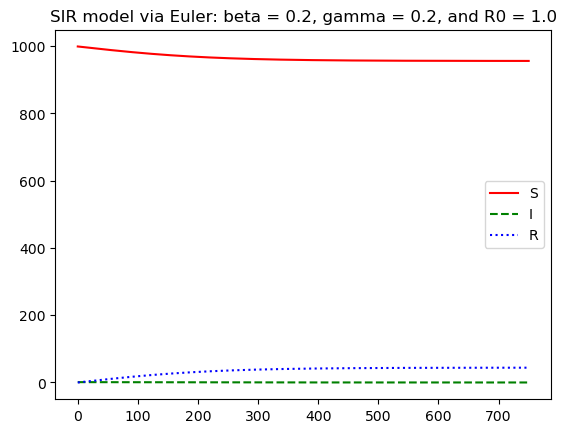

In [7]:
beta, gamma, N = 0.2, 0.2, 1000
main(N, beta, gamma, duration=750)

For this plot, I used the same parameters from the previous graph, but again increased gamma from 0.1 to 0.2.  We can see that the plots are now linear, and that very few people get infected with the disease.  In terms of R0, this also makes sense because if R0 > 1 we have a pandemic, whereas here it is 1 (people get infected at about the same rate as they recover).  I also changed the duration in order to see when the stable state is reached (apologies for the different x-axis for this plot).  It appears that after about 350 to 400 days the stable state is reached.

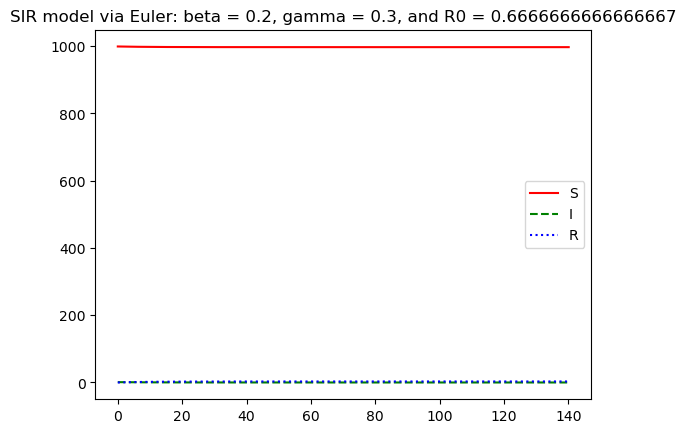

In [8]:
beta, gamma, N = 0.2, 0.3, 1000
main(N, beta, gamma)

The parameters for this plot are similar to the previous plot, but I again increased gamma, this time from 0.2 to 0.3.  R0 is now less than 1, which means that people recover faster than they are infected.  Similar to the previous plot, very few people get infected (even less than before).  Due to how flat the lines are, it is difficult to locate where the stable state is reached, but it appears to occur relatively close to the beginning (maybe around 20 to 40 days).

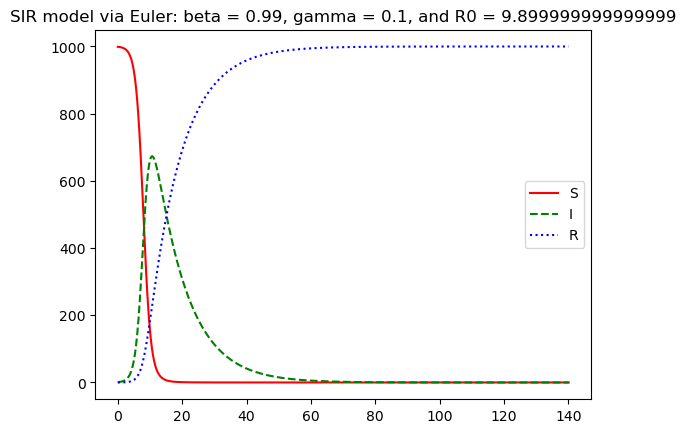

In [9]:
beta, gamma, N = 0.99, 0.1, 1000
main(N, beta, gamma)

Opposite of the previous graph, I decided to use a large value of beta and small value of gamma in order to encourage spread.  We can see that R0 is now much larger than it has been for any of the other graphs seen so far, which means that the initial spread of the disease is more severe (people get infected much faster than they recover).  Because of this, we see that peak infections are larger (close to 700), we reach peak infections much faster (around 12 days), and everyone gets infected at some point (the right tail of the red line is at 0).  The stable state appears to be reached after about day 70.

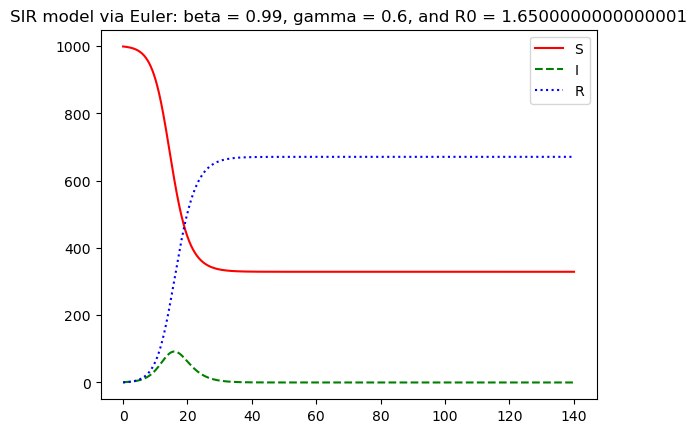

In [10]:
beta, gamma, N = 0.99, 0.6, 1000
main(N, beta, gamma)

Here, I used the same value of beta as the previous graph (0.99), but increased gamma by a good amount (from 0.1 to 0.6).  Because beta is still very large, we still reach peak infections in less than 20 days (similar to the previous graph).  However, because gamma is larger, people recover much faster than before, so the number of peak infections is now much smaller.  We can also see that not everyone gets infected (right tail of the red line is a little under 400) and that the stable state is also reached much faster than before (after about 30 days).  R0 is about 1.65, so we still have a pandemic (R0 > 1), but it's now much smaller than before (it was close to 10 in the prevous plot), so the severity of the pandemic isn't nearly as extreme.

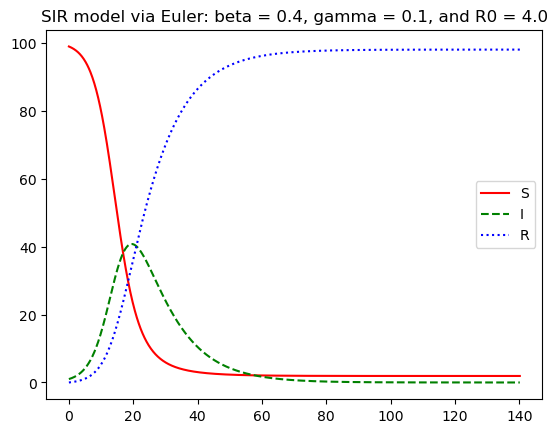

In [11]:
beta, gamma, N = 0.4, 0.1, 100
main(N, beta, gamma)

For the final three plots, I used the default parameters for beta and gamma (0.4 and 0.1, respectively), but experimented with different population sizes.  For this plot, I used an N of 100.  If we compare this with the first plot we saw (when N = 1000), we can see that, while R0 is the same, the time to reach peak infections is smaller and the number of peak infections is smaller.  Additionally, the time to reach the stable state is slightly smaller (around 70 days).  This makes sense because there are less possible people that can be infected (so the virus doesn't take as long to spread to the general population, and the peak number of infections is smaller).  However, similar to what we saw before, not everyone is infected (right tail of the red line is above 0).

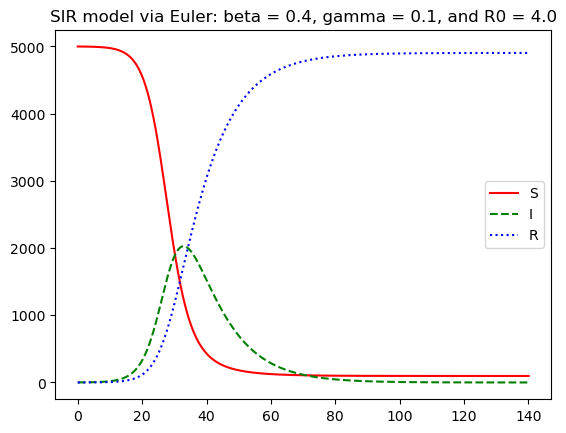

In [12]:
beta, gamma, N = 0.4, 0.1, 5000
main(N, beta, gamma)

Here, I increased the population size to 5000.  The time to reach peak infections is now larger, while the number of peak infections is also larger.  Again, this makes sense because we're now dealing with more people, so the virus might require more time to reach the general population, and the number of peak infections will naturally be larger.  Once again, not everyone is infected.

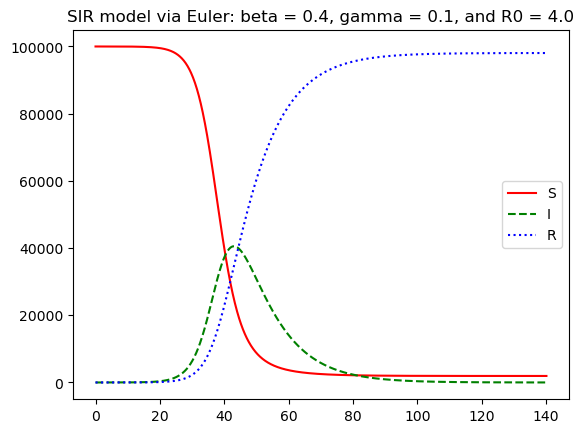

In [13]:
beta, gamma, N = 0.4, 0.1, 100000
main(N, beta, gamma)

For the final plot, I increased the population size again, but this time to 100000.  Once again, we see that not everyone is infected, but both the time to reach peak infections and the number of peak infections increased.